In [1]:
import pandas as pd
%config Completer.use_jedi = False
from matplotlib import pyplot as plt
%matplotlib inline

# Binding (or Adsorption) Energy (re)Referencing Scheme

_by Gabriel S. Gusmão (Aug, 2021)_ 

<gusmaogabriels@gmail.com>/<gusmaogabriels@gatech.edu>

## Binding Energy
- Energy associated with a chemical state given reference energy states, i.e. ***it is not an absolute quantit. It is a function of reference energies***.
- Binding energies can be computed from raw-DFT energies or referenced from known reaction energies for a given chemical system.



## Case Study microkinetic model for CO/CO$_2$ hydrogenation to methanol + water-gas shift by Dr. Grabow$^\dagger$
### 42 elementary-reaction, 30 chemical-species

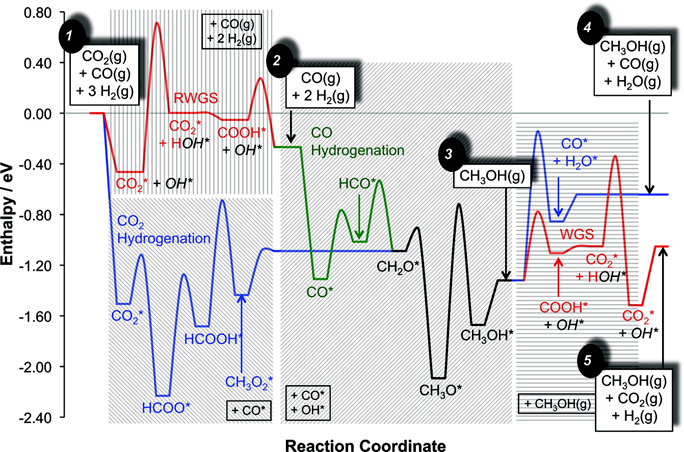

$^\dagger$ Grabow, L. C. & Mavrikakis, M. Mechanism of Methanol Synthesis on Cu through CO2 and CO Hydrogenation. ACS Catal. 1, 365–384 (2011).

Followig, the raw data from Dr. Grabow's paper is loaded, where `dE` are reaction energies in $eV$, and a separate (hydrogen reservoir) site is added for atomic hydrogen.

In [2]:
raw_data = pd.read_json('./data/grabow/raw_data.json');
raw_data

,rxn,dE
1,CO2_g + *_s -> CO2*_s,-0.08
2,H2_g + 2*_h -> 2H*_h,-0.29
3,CO_g + *_s -> CO*_s,-0.86
4,H2O_g + *_s -> H2O*_s,-0.21
5,HCOOH_g + *_s -> HCOOH*_s,-0.22
6,CH2O_g + *_s -> CH2O*_s,-0.04
7,CH3OH_g + *_s -> CH3OH*_s,-0.28
8,HCOOCH3_g + *_s -> HCOOCH3*_s,-0.10
9,CO2*_s + *_s -> CO*_s + O*_s,1.12
10,COOH*_s + *_s -> CO*_s + OH*_s,-0.14


## Binding Energies from Raw DFT Energies

#### Atomic/elemental matrix
- The atomic matrix consists of the number of chemical elements of a specific type for each chemical species; therefore, it is a $ n_{species}\times n_{elements}$ matrix. Species here can be considered as states, since they encompass both gas-phase and bound chemical species.
- Active sites are considered as pseudo-elements in the system

Below, we load a preprocessed atomic matrix for Dr. Grabow's paper, `Ma`.

In [3]:
Ma_ = pd.read_json('./data/grabow/atomic_matrix.json')
display(Ma_.head(500))
Ma = Ma_.values

,*_h,*_s,C,H,O
*_h,1,0,0,0,0
*_s,0,1,0,0,0
CH2O*_s,0,1,1,2,1
CH2OH*_s,0,1,1,3,1
CH2O_g,0,0,1,2,1
CH3O*_s,0,1,1,3,1
CH3O2*_s,0,1,1,3,2
CH3OH*_s,0,1,1,4,1
CH3OH_g,0,0,1,4,1
CO*_s,0,1,1,0,1


And folowing GGA-level (PBE) energies for each individial state are loaded for different metallic surfaces.

We are going to use Cu(111) as case study here.

In [4]:
E_raw = pd.read_json('./data/grabow/raw_dft.json')
E_raw.head(5)

,Cu(211),Cu(111),Pd(211),Pt(211),Rh(211),Ag(211),Au(211)
*_h,-197764.135245,-197765.085060,-123999.125283,-103185.773434,-106234.599516,-140714.147663,-134520.546438
*_s,-197764.135245,-197765.085060,-123999.125283,-103185.773434,-106234.599516,-140714.147663,-134520.546438
CH2O*_s,-198613.265305,-198613.816588,-124848.330119,-104034.866635,-107083.793192,-141562.980995,-135369.376106
CH2OH*_s,-198629.463463,-198629.895913,-124864.792637,-104051.846973,-107100.679487,-141578.898364,-135385.740832
CH2O_g,-848.688366,-848.688366,-848.688366,-848.688366,-848.688366,-848.688366,-848.688366


The number of degrees-of-freedom in this system equals the number of chemical elements, including the active sites, for which reference values must be defined.

To compute formation energies, we therefore need to define reference species. In this case we choose $CO_{(g)}$, $H{_2}_{(g)}$ and $H_2O_{(g)}$. Notice that all chemical elements ($C$, $O$, and $H$) must be included in the set of reference chemical species. We following build the extended matrix $M_{ext}=[M_a, I]$, where $I$ is the identity matrix $n_{species}\times n_{species}$, and drop the columns in $I$ associated with the defined chemical species. We finally obtain a full-rank and invertible matrix that can be used to solve for the dummy references $C$, $O$ and $H$, as follows.

$$M_{ext}\times\Delta E_{f}=E_{DFT}$$


In [5]:
ref_sps = ['CO_g','CO2_g','H2_g','*_s','*_h']         # define reference species
Eref    = np.array([0.,0.,0.,0.,0.])                  # reference species energies
mref = np.where([_ in ref_sps for _ in Ma_.index])[0] # find positions of reference species
mcols = np.array(list(set(range(len(Ma)))-set(mref))) # all other species

Solving the linear system

In [6]:
dEf_a  = np.zeros(len(Ma_))                             # allocate space for formation energies
Mext   = np.hstack((Ma,np.eye(Ma.shape[0])[:,mcols]))   # extended matrix only non-refrence species
Es     = E_raw['Cu(111)'].values                        # raw DFT energies vector
dEf_a[mcols] = np.linalg.solve(Mext,Es)[len(ref_sps):]  # linear system

Formation energies

In [7]:
pd.DataFrame(zip(E_raw['Cu(111)'].values,dEf_a),index=Ma_.index,\
             columns=pd.MultiIndex.from_tuples([('Cu(111)','DFT'),('Cu(111)','Ef')]))

Cu(111)          
                       DFT        Ef
*_h         -197765.085060  0.000000
*_s         -197765.085060  0.000000
CH2O*_s     -198613.816588 -0.605626
CH2OH*_s    -198629.895913 -0.823442
CH2O_g         -848.688366 -0.562464
CH3O*_s     -198630.805365 -1.732895
CH3O2*_s    -199197.450711 -0.304541
CH3OH*_s    -198646.958871 -2.024892
CH3OH_g        -881.686666 -1.837747
CO*_s       -198582.258153 -0.770208
CO2*_s      -199149.583594 -0.021949
CO2_g         -1384.476584  0.000000
CO3*_s      -199715.612772  2.022571
COH*_s      -198597.111176  0.238278
COOH*_s     -199165.053933  0.369220
CO_g           -816.402885  0.000000
H*_h        -197781.131496 -0.184928
H2CO2*_s    -199180.952833  0.331829
H2COOCH3*_s -199480.172844 -2.974471
H2O*_s      -198364.322075  0.559701
H2O_g          -599.047721  0.748995
H2_g            -31.723017  0.000000
HCO*_s      -198597.497763 -0.148309
HCO3*_s     -199732.874257  0.622596
HCOH*_s     -198613.355603 -0.144641
HCOO*_s     -199165.814737 -0.391584
HCOOCH3*_s  -199464.223855 -2.886991
HCOOCH3_g     -1699.054584 -2.802780
HCOOH*_s    -199181.606326 -0.321665
HCOOH_g       -1416.294467 -0.094866
O*_s        -198331.439796  1.718963
OH*_s       -198348.124986  0.895282

## Binding Energies from Reaction Energies

#### Stoichiometr(y/ic) matrix
- The stoichiometry matrix, $M$, represents a graph encompassing the stoichiometry of each chemical species in every elementary step in which it is involved.
- The dimensions of the stoichiometry matrix is $n_{reactions}\times n_{species}$ in a particular chemical system.

In [8]:
M_ = pd.read_json('./data/grabow/stoich_matrix.json')
M = M_.values
M_.head(5)             

,*_h,*_s,CH2O*_s,CH2OH*_s,CH2O_g,CH3O*_s,CH3O2*_s,CH3OH*_s,CH3OH_g,CO*_s,...,HCO*_s,HCO3*_s,HCOH*_s,HCOO*_s,HCOOCH3*_s,HCOOCH3_g,HCOOH*_s,HCOOH_g,O*_s,OH*_s
CO2_g + *_s -> CO2*_s,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H2_g + 2*_h -> 2H*_h,-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CO_g + *_s -> CO*_s,0,-1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
H2O_g + *_s -> H2O*_s,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HCOOH_g + *_s -> HCOOH*_s,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-1,0,0


Reaction energies are reference-freem and they can be estimated directly from raw DFT energies by the simple matrix-vector multipliciation between the stoichiometry matrix and the DFT energies vector.
$$M\times E_{DFT}=\Delta E_{r}$$
Here, we still use the Cu(111) GGA-level (PBE) energies as in the previous section.

In [9]:
dEr = M.dot(Es) # reaction energies

With the computed reaction energies, formation energies can be defined thrown the Moore-Penrose pseudo inverse of the stoichiometry matrix, $M^+$.

$$ E_{f}=M^+\times\Delta E_{rxn}$$

However, instead of computing the Moore-Penrose matrix inversion directly, we can first perform the singular-value decomposition of $M$ to confirm that the number of zero singular values equals the number of degrees of freedom in the chemical system.

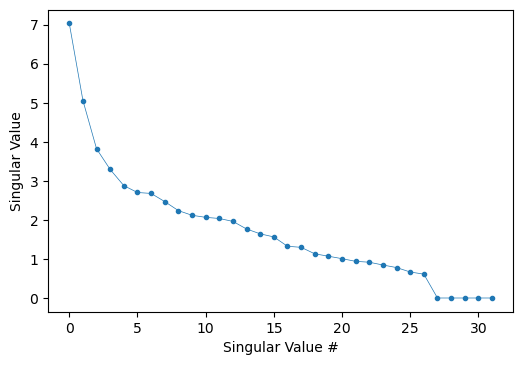

In [10]:
U,s,Vt = np.linalg.svd(M)
plt.figure(dpi=100)
plt.plot(s,'.-',lw=0.5); plt.gca().set_xlabel('Singular Value #'); plt.gca().set_ylabel('Singular Value');

That means we have 5 singular-values, as expected. Therefore, if split M into columns that refer to non-reference species, $M_{sp}$ and those that refer to reference species, $M_{ref}$, we end up with an invertible matrix.
$$ E_{f}=M_{sp}^{+}\times\left(\Delta E_{r}-M_{ref}\times E_{ref}\right)$$
Which, in this parameterized version, allows for a direct relationship between formation energies and reference energies values. 

Using this representation to solve for formation energies given the same reference species as in the previous section, we have.

In [11]:
dEf        = np.zeros(len(Ma_))                                          # allocate space for formation energies
dEf[mcols] = np.linalg.pinv(M[:,mcols]).dot(dEr-np.dot(M[:,mref],Eref))  # solving linear system through SVD

And below we can see that the formation energies computed by either methods are the same.

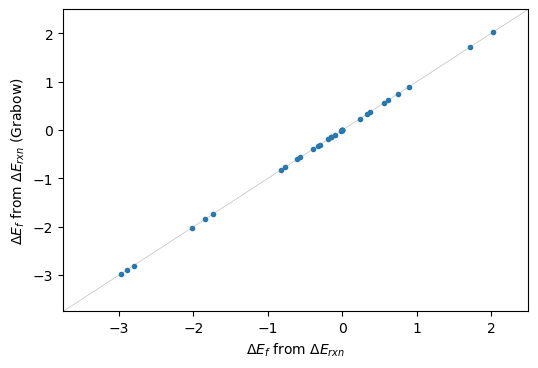

In [12]:
plt.figure(dpi=100)
plt.plot(dEf,dEf_a,'.'); plt.gca().set_xlabel('$\Delta E_{f}$ from $\Delta E_{rxn}$'); 
plt.gca().set_ylabel('$\Delta E_{f}$ from $\Delta E_{DFT}$');plt.gca().set_ylabel('$\Delta E_{f}$ from $\Delta E_{rxn}$ (Grabow)'); 
plt.plot([-3.75,2.5],[-3.75,2.5],'-',lw=0.5,c='grey',alpha=0.5)
plt.gca().set_xbound([-3.75,2.5]); plt.gca().set_ybound([-3.75,2.5])

## Comparing Grabow's vs. DFT energies

Now we can use the same rereferencing scheme, starting from reaction energies on Grabow's paper data.

In [13]:
dEr_grbw = raw_data['dE'].values # Grabow's reaction energies

In [14]:
dEf_grbw        = np.zeros(len(Ma_))                                          # allocate space for formation energies
dEf_grbw[mcols] = np.linalg.pinv(M[:,mcols]).dot(dEr_grbw-np.dot(M[:,mref],Eref))  # solving linear system through SVD

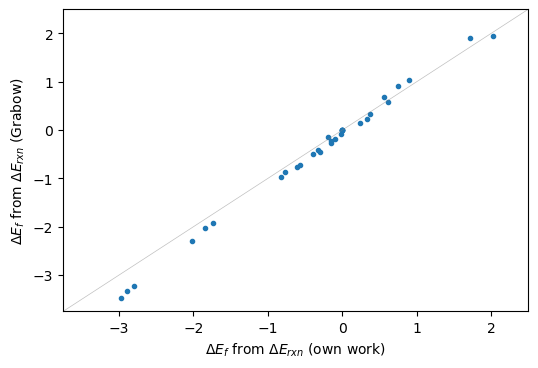

In [15]:
plt.figure(dpi=100)
plt.plot(dEf,dEf_grbw,'.'); plt.gca().set_ylabel('$\Delta E_{f}$ from $\Delta E_{rxn}$ (Grabow)'); 
plt.plot([-3.75,2.5],[-3.75,2.5],'-',lw=0.5,c='grey',alpha=0.5)
plt.gca().set_xbound([-3.75,2.5]); plt.gca().set_ybound([-3.75,2.5])
plt.gca().set_xlabel('$\Delta E_{f}$ from $\Delta E_{rxn}$ (own work)');

There is large variation for larger moleculecules, lower end in formation energies, which refer to methyl-formate, longer chain molecules. Such discrepancies might be either due to wrong final geometries, not accounting for long-range interaction (vdW) or even due to corrections that might have been applied by Grabow and were not included in this analysis.

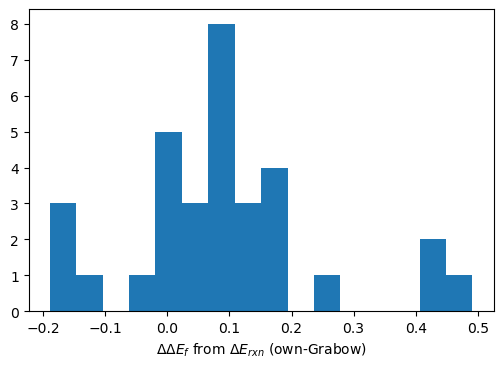

In [16]:
plt.figure(dpi=100)
plt.hist(dEf-dEf_grbw,bins=16); plt.gca().set_xlabel('$\Delta\Delta E_{f}$ from $\Delta E_{rxn}$ (own-Grabow)'); 